 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns with set index, and date-time formatting options 
wh_df = pd.read_csv('./Resources/whale_returns.csv')
wh_df['Date'] = pd.to_datetime(wh_df['Date'])
wh_df.set_index('Date',inplace = True)
wh_df.sort_index(inplace=True)
wh_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
wh_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
wh_df.dropna(inplace=True)
wh_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns with set index, and date-time formatting options
al_df = pd.read_csv('./Resources/algo_returns.csv')
al_df['Date'] = pd.to_datetime(al_df['Date'])
al_df.set_index('Date',inplace = True)
al_df.sort_index(inplace=True)
al_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
al_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
al_df.dropna(inplace=True)
al_df.head(10)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
2014-06-12,-0.000028,-0.003841
2014-06-13,0.001917,-0.000814
2014-06-16,0.001084,0.001831
2014-06-17,0.000922,0.006870


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices with set index, and date-time formatting options
sp_df = pd.read_csv('./Resources/sp_tsx_history.csv')
sp_df['Date'] = pd.to_datetime(sp_df['Date'])
sp_df.set_index('Date',inplace = True)
sp_df.sort_index(inplace=True)

#Removed currency symbol ($) and comma
sp_df['Close'] = sp_df['Close'].str.replace('$','')
sp_df['Close'] = sp_df['Close'].str.replace(',','')

sp_df.head(10)

/var/folders/kx/y139fdw93n3f78m5fftks16w0000gn/T/ipykernel_29252/2064565517.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_df['Close'] = sp_df['Close'].str.replace('$','')


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
2012-10-09,12273.57
2012-10-10,12212.42
2012-10-11,12233.95
2012-10-12,12202.04


In [9]:
# Check Data Types
print(f'Whale Data Type:\n{wh_df.dtypes}\n')

print(f'Algo Data Type:\n{al_df.dtypes}\n')

print(f'S&P Data Type:\n{sp_df.dtypes}')

Whale Data Type:
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

Algo Data Type:
Algo 1    float64
Algo 2    float64
dtype: object

S&P Data Type:
Close    object
dtype: object


In [10]:
# Fix Data Types
sp_df['Close'] = pd.to_numeric(sp_df['Close'])
print(f'S&P Data Type:\n{sp_df.dtypes}')

S&P Data Type:
Close    float64
dtype: object


In [11]:
# Calculate Daily Returns and drop nulls
sp_ret_df = sp_df.pct_change().dropna().copy(deep=True)

In [12]:
sp_ret_df.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp_ret_df.rename(columns={'Close':'S&P TSX'},inplace=True)

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
con_df = pd.concat([wh_df,al_df,sp_ret_df],axis='columns',join='inner')
con_df.index = pd.to_datetime(con_df.index)
con_df.sort_index(inplace=True)
con_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

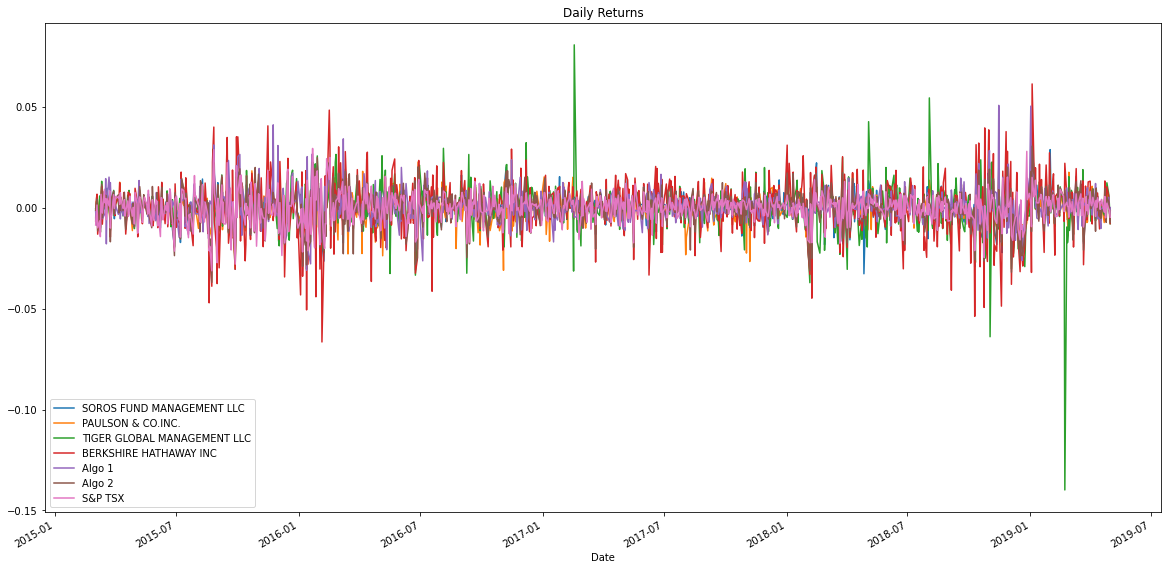

In [15]:
# Plot daily returns of all portfolios
con_df.plot(figsize=(20,10),title='Daily Returns')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cummulative Daily Returns'}, xlabel='Date'>

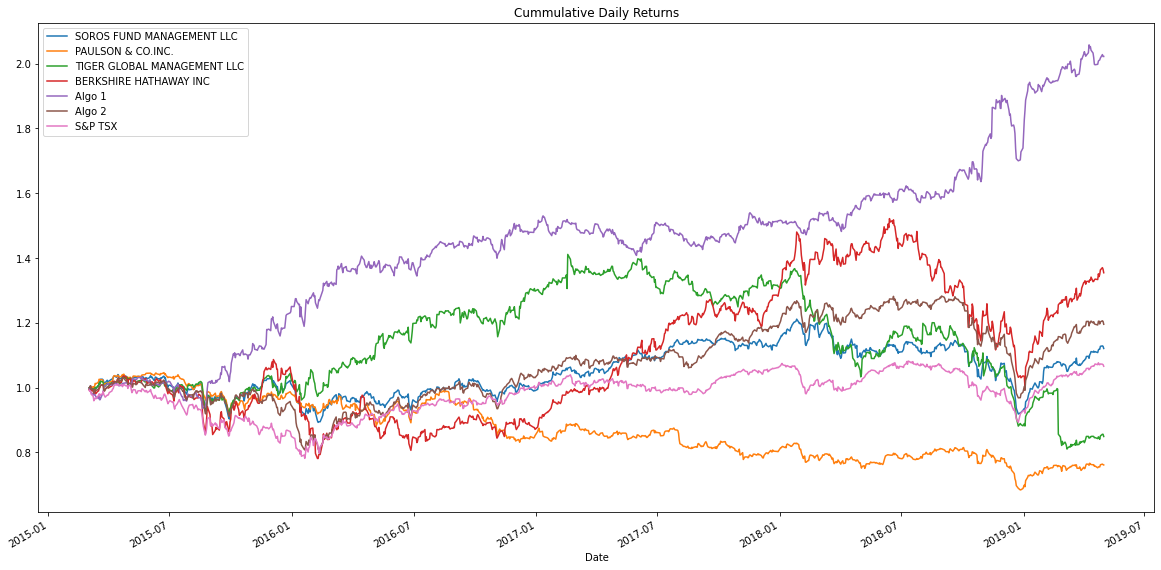

In [16]:
# Calculate cumulative returns of all portfolios
cumm_con_df = (1+con_df).cumprod()
# Plot cumulative returns
cumm_con_df.plot(figsize=(20,10),title='Cummulative Daily Returns')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


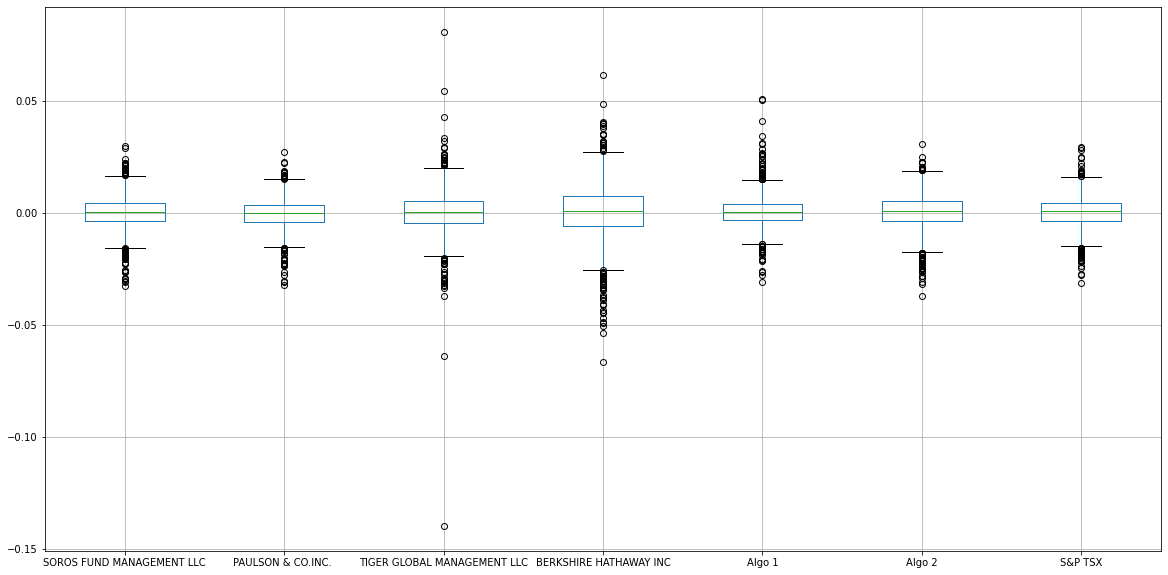

In [17]:
# Box plot to visually show risk
bxplt = con_df.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
sd_con_df = con_df.std()
sd_con_df

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [19]:
# Calculate  the daily standard deviation of S&P TSX 60
sd_sp_df = con_df['S&P TSX'].std()
sd_sp_df
# Determine which portfolios are riskier than the S&P TSX 60
variance = con_df['S&P TSX'].var()

portos = ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2']

for porto in portos:
    covariance = con_df[porto].cov(con_df['S&P TSX'])
    beta = covariance/variance
    print (f'Beta of {porto} is {beta}')
    if beta > 1:
        print (f'{porto} is a riskier portofolio than S&P TSX 60\n')
    elif beta == 0:
        print (f'Hard to tell\n')
    elif beta < 1:
        print (f'{porto} has less risk than S&P TSX 60\n')

Beta of SOROS FUND MANAGEMENT LLC is 0.7499446668435337
SOROS FUND MANAGEMENT LLC has less risk than S&P TSX 60

Beta of PAULSON & CO.INC.  is 0.4829254312956258
PAULSON & CO.INC.  has less risk than S&P TSX 60

Beta of TIGER GLOBAL MANAGEMENT LLC is 0.6816404904244641
TIGER GLOBAL MANAGEMENT LLC has less risk than S&P TSX 60

Beta of BERKSHIRE HATHAWAY INC is 1.0160439091063609
BERKSHIRE HATHAWAY INC is a riskier portofolio than S&P TSX 60

Beta of Algo 1 is 0.33474459081856844
Algo 1 has less risk than S&P TSX 60

Beta of Algo 2 is 0.8728267344999595
Algo 2 has less risk than S&P TSX 60



### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_sd = con_df.std() * np.sqrt(252)
annualized_sd

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

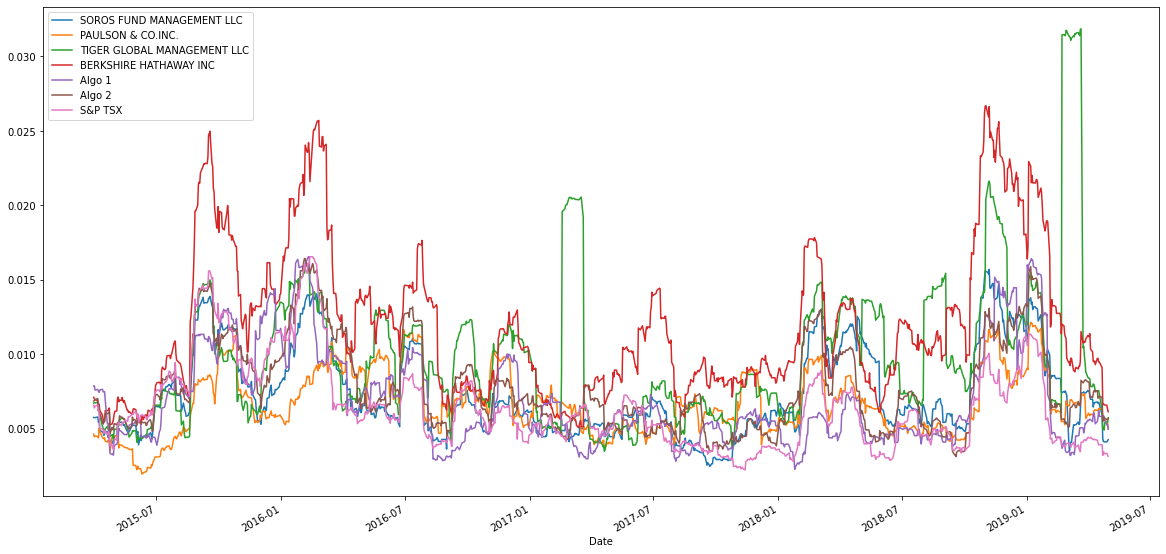

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
std_plt = con_df.rolling(window=21).std()
# Plot the rolling standard deviation
std_plt.plot(figsize=(20,10))

### Calculate and plot the correlation

In [22]:
# Calculate the correlation
corr_df = con_df.corr().style.background_gradient(cmap='coolwarm')
# Display de correlation matrix
corr_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

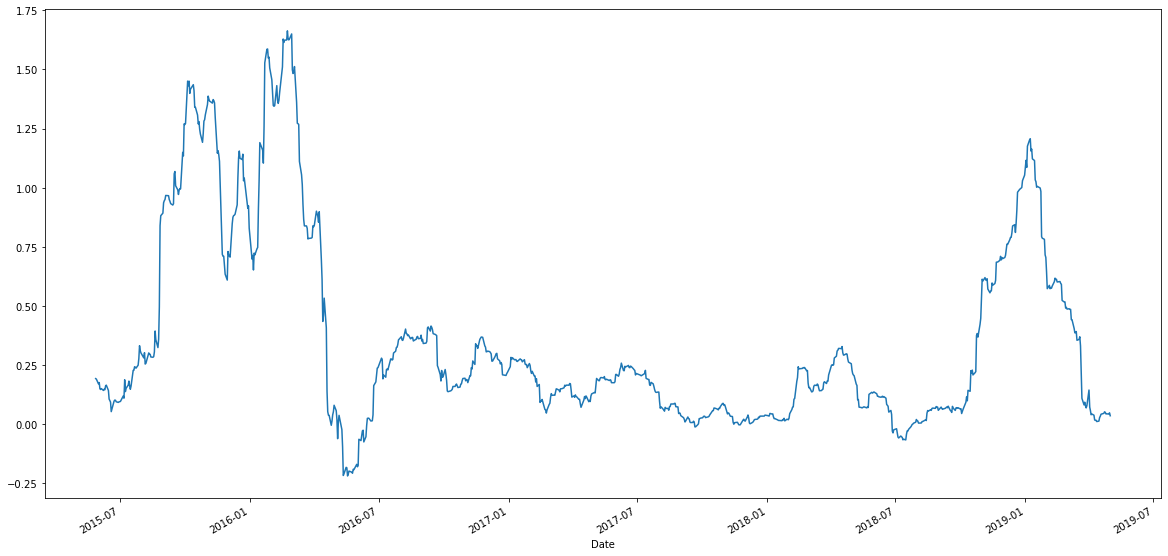

In [23]:
# Calculate covariance of a single portfolio
algo1_cov = con_df['Algo 1'].rolling(window=60).cov(con_df['S&P TSX'])
# Calculate variance of S&P TSX
variance
# Computing beta
algo1_beta = algo1_cov/variance
# Plot beta trend
algo1_beta.plot(figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

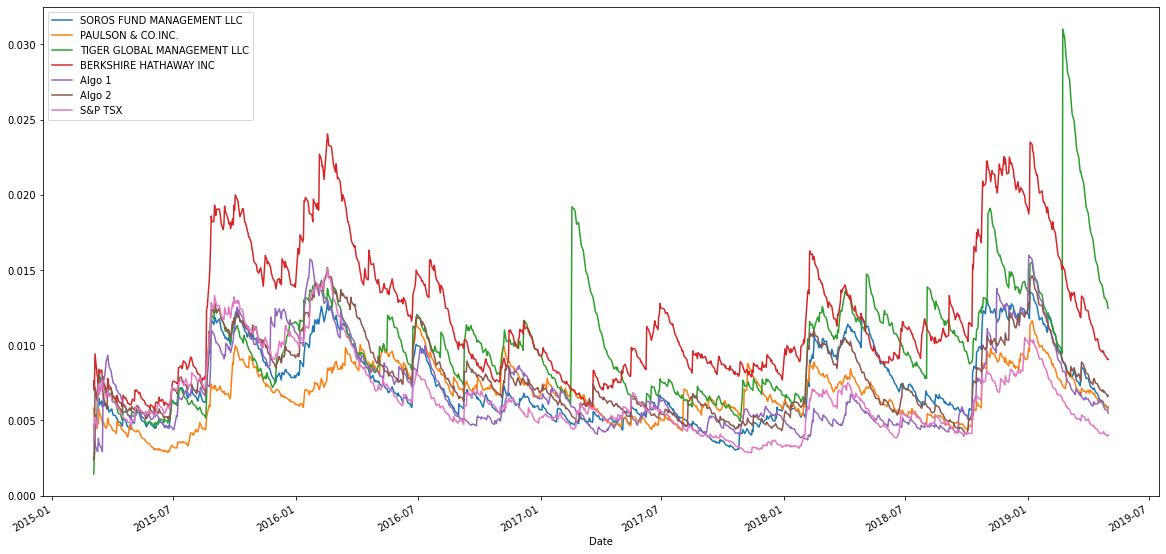

In [24]:
# Use `ewm` to calculate the rolling window
ewm_plt = con_df.ewm(21).std().dropna()
ewm_plt.plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratios_annualized = (con_df.mean()*252)/annualized_sd 
sharpe_ratios_annualized

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

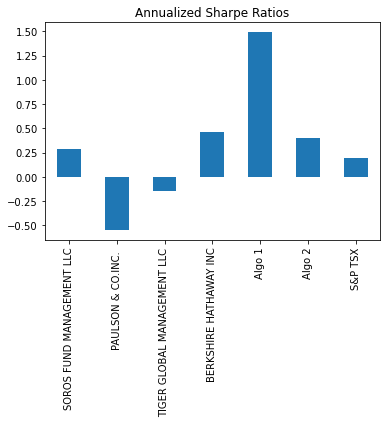

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_annualized.plot(kind='bar',title='Annualized Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---While Algo 1 and Algo 2 outperform the S&P TSX 60, Berkshire Hathaway Inc perfromed better than Algo 2.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
ap_df = pd.read_csv('./Resources/APPLE - Sheet1.csv',index_col='Date',infer_datetime_format=True,parse_dates=True)
ap_df.sort_index(inplace=True)
ap_df.head()

,Close
Date,
2015-03-03,32.34
2015-03-04,32.14
2015-03-05,31.60
2015-03-06,31.65
2015-03-09,31.79


In [28]:
# Reading data from 2nd stock
go_df = pd.read_csv('./Resources/GOOGLE - Sheet1.csv',index_col='Date',infer_datetime_format=True,parse_dates=True)
go_df.sort_index(inplace=True)
go_df.head()

,Close
Date,
2015-03-03,572.07
2015-03-04,571.80
2015-03-05,573.75
2015-03-06,566.13
2015-03-09,567.29


In [29]:
# Reading data from 3rd stock
ty_df = pd.read_csv('./Resources/TOYOTA - Sheet1.csv',index_col='Date',infer_datetime_format=True,parse_dates=True)
ty_df.sort_index(inplace=True)
ty_df.head()

,Close
Date,
2015-03-03,135.40
2015-03-04,135.52
2015-03-05,134.90
2015-03-06,134.89
2015-03-09,135.39


In [30]:
# Combine all stocks in a single DataFrame
myp_df = pd.concat([ap_df,go_df,ty_df],axis='columns',join='inner')
myp_df.head()

,Close,Close,Close
Date,,,
2015-03-03,32.34,572.07,135.40
2015-03-04,32.14,571.80,135.52
2015-03-05,31.60,573.75,134.90
2015-03-06,31.65,566.13,134.89
2015-03-09,31.79,567.29,135.39


In [31]:
# Reset Date index
# Date index set in read_csv() options

In [32]:
# Reorganize portfolio data by having a column per symbol
myp_df.columns = ['AAPL','GOOGL','TM']
myp_df.head()

,AAPL,GOOGL,TM
Date,,,
2015-03-03,32.34,572.07,135.40
2015-03-04,32.14,571.80,135.52
2015-03-05,31.60,573.75,134.90
2015-03-06,31.65,566.13,134.89
2015-03-09,31.79,567.29,135.39


In [33]:
# Calculate daily returns
# Drop NAs
myp_ret_df = myp_df.pct_change().dropna()
# Display sample data
myp_ret_df.head()

,AAPL,GOOGL,TM
Date,,,
2015-03-04,-0.006184,-0.000472,0.000886
2015-03-05,-0.016801,0.003410,-0.004575
2015-03-06,0.001582,-0.013281,-0.000074
2015-03-09,0.004423,0.002049,0.003707
2015-03-10,-0.020761,-0.024326,-0.012556


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
wr_df = myp_ret_df.dot(weights)
# Display sample data
wr_df.head()

Date
2015-03-04   -0.001923
2015-03-05   -0.005989
2015-03-06   -0.003924
2015-03-09    0.003393
2015-03-10   -0.019215
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
wc_df = pd.concat([con_df,wr_df],axis='columns')
wc_df.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,0
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.001923
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.005989
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.003924
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,0.003393
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321,-0.019215
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655,-0.007631
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.002139,0.017400
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.002655,-0.010462


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
#First correct column naming

wc_df.columns = ['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC. ','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2','S&P TSX','Weighted Portofolio']
wc_df.dropna(inplace=True)
wc_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Weighted Portofolio
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,-0.001923
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.005989
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.003924
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,0.003393
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321,-0.019215


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`
wc_st = wc_df.std()*np.sqrt(252)
wc_st

SOROS FUND MANAGEMENT LLC      0.124343
PAULSON & CO.INC.              0.110923
TIGER GLOBAL MANAGEMENT LLC    0.172883
BERKSHIRE HATHAWAY INC         0.203727
Algo 1                         0.120580
Algo 2                         0.132251
S&P TSX                        0.111666
Weighted Portofolio            0.182282
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Standard Dev.'}, xlabel='Date'>

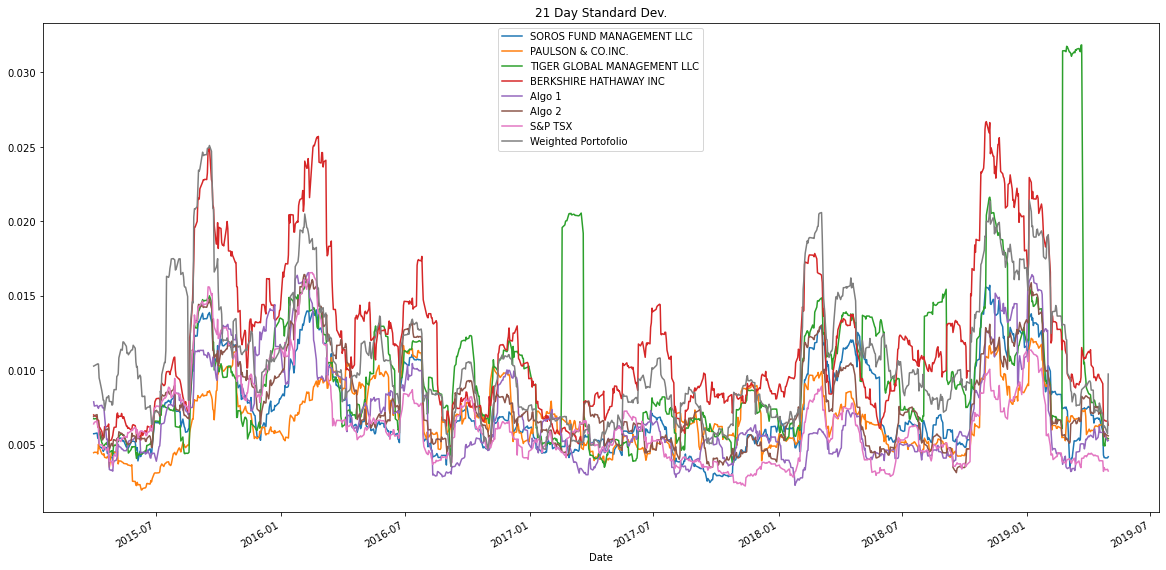

In [38]:
# Calculate rolling standard deviation
wc_r_st = wc_df.rolling(window=21).std()
# Plot rolling standard deviation
wc_r_st.plot(figsize=(20,10),title='21 Day Standard Dev.')

### Calculate and plot the correlation

In [39]:
# Calculate and plot the correlation
wc_c = wc_df.corr().style.background_gradient(cmap='coolwarm')
wc_c

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Weighted Portofolio
SOROS FUND MANAGEMENT LLC,1.000000,0.697213,0.560731,0.750091,0.313787,0.826554,0.674055,0.670955
PAULSON & CO.INC.,0.697213,1.000000,0.433111,0.539889,0.266199,0.674220,0.486177,0.514581
TIGER GLOBAL MANAGEMENT LLC,0.560731,0.433111,1.000000,0.423308,0.161217,0.506383,0.440595,0.500618
BERKSHIRE HATHAWAY INC,0.750091,0.539889,0.423308,1.000000,0.289260,0.684485,0.556903,0.706739
Algo 1,0.313787,0.266199,0.161217,0.289260,1.000000,0.285471,0.310121,0.239772
Algo 2,0.826554,0.674220,0.506383,0.684485,0.285471,1.000000,0.737610,0.658567
S&P TSX,0.674055,0.486177,0.440595,0.556903,0.310121,0.737610,1.000000,0.573923
Weighted Portofolio,0.670955,0.514581,0.500618,0.706739,0.239772,0.658567,0.573923,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling Beta, Weighted Portofoli vs. S&P TSX 60'}, xlabel='Date'>

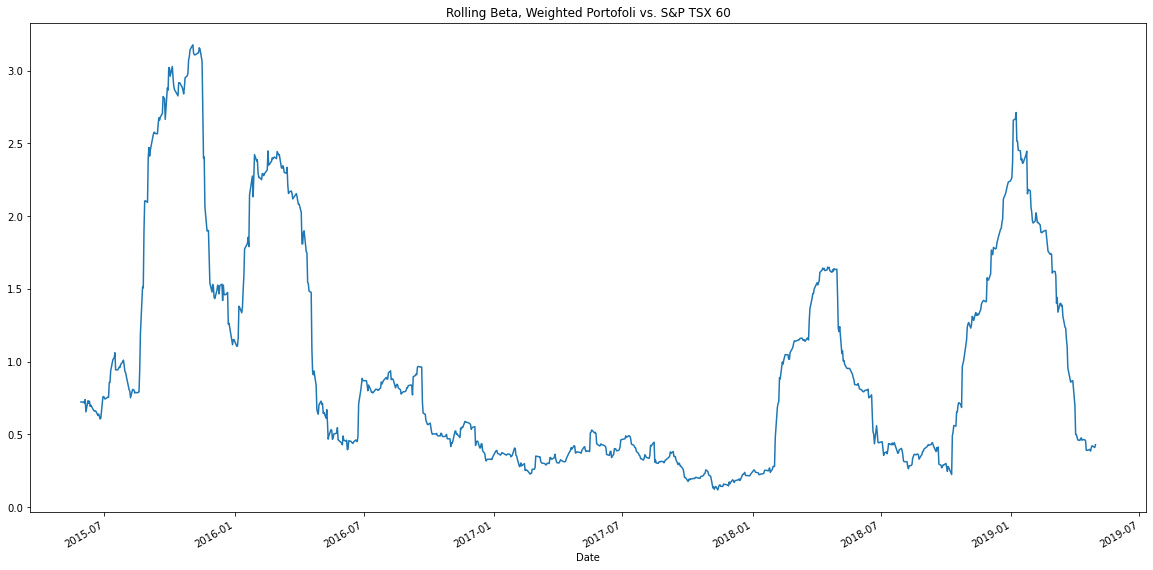

In [40]:
# Calculate and plot Beta
wp_ret_cov = wc_df['Weighted Portofolio'].rolling(window=60).cov(wc_df['S&P TSX'])
# Computing beta
wp_beta = wp_ret_cov/variance
# Plot beta trend
wp_beta.plot(figsize=(20,10),title='Rolling Beta, Weighted Portofoli vs. S&P TSX 60')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualized Sharpe Ratios
wp_sharpe_ratios_annualized = (wc_df.mean()*252)/(wc_df.std() * np.sqrt(252)) 
wp_sharpe_ratios_annualized

SOROS FUND MANAGEMENT LLC      0.301110
PAULSON & CO.INC.             -0.534272
TIGER GLOBAL MANAGEMENT LLC   -0.132665
BERKSHIRE HATHAWAY INC         0.485005
Algo 1                         1.496819
Algo 2                         0.412780
S&P TSX                        0.225006
Weighted Portofolio            0.528116
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

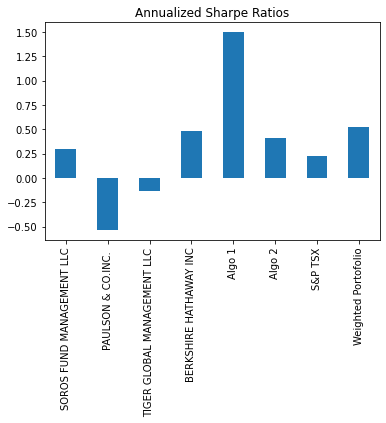

In [42]:
# Visualize the sharpe ratios as a bar plot
wp_sharpe_ratios_annualized.plot(kind='bar',title='Annualized Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

In [43]:
This equally weighted portofolio was only outmatched by Algo 1

SyntaxError: invalid syntax (1438595377.py, line 1)